# Radial Basis Function Network

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from UnsupervisedLearning import Stochastic_K_means
from MultilayerPerceptronNetwork import Train_MLP, Test_MLP
import nn_Utilities as nn


# Note:

- All the code related to neural networks is impleted step by step in the definition files
- No, library such as tensor flow or scikit-learn is used to solve this task
- The Multilayer perceptron used in this code is flexible , i.e, it can used with any architecture of the network.
- Finally, k_means is implmented in stochastic way inorder to deal with the big data(not of relavance in this case)

In [2]:
# Data Intialization
trainingData  = np.loadtxt('RBF_data.txt')

x1 = np.reshape(trainingData[:,1],(-1,1))
x2 = np.reshape(trainingData[:,2],(-1,1))
x = np.concatenate((x1,x2), axis=1)

y = np.reshape(trainingData[:,0],(-1,1))

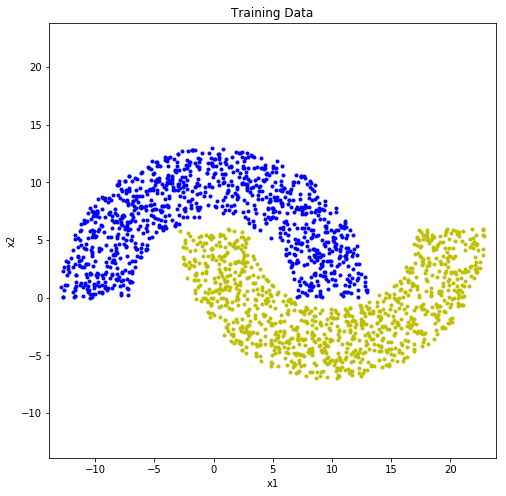

In [10]:
# Visualize data
def inputData_visualization():
    pos = np.where(y== 1) 
    neg = np.where(y==-1)
    a1Pos = x1[pos[0]]
    a1Neg = x1[neg[0]]
    a2Pos = x2[pos[0]]
    a2Neg = x2[neg[0]]
    f, ax = plt.subplots(figsize=(8, 8))
    plt.title('Training Data')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(a1Pos,a2Pos,'b.')
    plt.plot(a1Neg,a2Neg,'y.')
    maxi = np.max([np.max(x1),np.max(x2)]) + 1
    mini = np.min([np.min(x1),np.min(x2)]) - 1
    plt.axis([mini,maxi,mini,maxi])
inputData_visualization()
plt.show()

In [4]:
# Unsupervised learning with Stochastic K_means algorithm

# Control parameters
clusters = 10
nPatterns = np.size(y)
inputDimensions = np.size(x,axis=1)

weightMatrixUnsupervised = Stochastic_K_means(inputData = x,nClusters =10,inputDimensions=2,batchSize=2000,checkData=50,updates= 1000)

print(weightMatrixUnsupervised)



Final Variance =  0.0
[[  4.21481389  -2.23746483]
 [  3.53246394   9.64861947]
 [  9.000568     4.17318272]
 [ 15.38398058  -2.1667766 ]
 [ -4.18968353   9.20434137]
 [ -9.28975849   3.8063563 ]
 [  9.75069767  -4.02180977]
 [ 19.53263415   2.84451942]
 [  0.55111794   2.58166279]
 [ 18.60104855  20.27010661]]


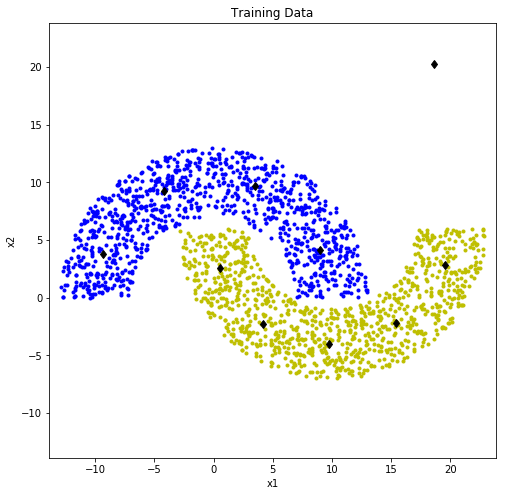

In [11]:
# Visualize data with weights from the k_means

inputData_visualization()
plt.plot(weightMatrixUnsupervised[:,0],weightMatrixUnsupervised[:,1],'kd')
plt.show()

In [6]:
# Radial basis function applied on the k_means output

def GetGaussian(weightMatrix, randomDataPoint):
    x1 = randomDataPoint[:,0]
    x2 = randomDataPoint[:,1]
    wx1 = np.reshape(weightMatrix[:,0],(-1,1))
    wx2 = np.reshape(weightMatrix[:,1],(-1,1))
    eucledianDistanceMatrix = np.sqrt(np.square(wx1-x1) + np.square(wx2-x2))

    allExponentValuesMatrix = np.exp(-np.square(eucledianDistanceMatrix)/2)
    gaussianNeuronMatrix = allExponentValuesMatrix/np.sum(allExponentValuesMatrix,axis=0)
    return gaussianNeuronMatrix


outputUnsupervised = GetGaussian(weightMatrixUnsupervised,x)

In [7]:
#Supervised Multilayer perceptron network

inputSupervised = np.transpose(outputUnsupervised)
arch = {'hiddenLayers': 3,'respectiveHiddenUnits':[4,4,8]}
w2 = Train_MLP(trainingData=inputSupervised,targetOutputs=y,batchSize=100,eta=0.01,architecture=arch,outputClasses=1)

0  Upadtes completed out of 100000 , Energy:  0.514669488561
10  Upadtes completed out of 100000 , Energy:  0.495178797322
20  Upadtes completed out of 100000 , Energy:  0.478861576539
30  Upadtes completed out of 100000 , Energy:  0.42791194244
40  Upadtes completed out of 100000 , Energy:  0.228809749933
50  Upadtes completed out of 100000 , Energy:  0.0463483153389
60  Upadtes completed out of 100000 , Energy:  0.0230018569756
70  Upadtes completed out of 100000 , Energy:  0.0179454856372
80  Upadtes completed out of 100000 , Energy:  0.0155650153772
90  Upadtes completed out of 100000 , Energy:  0.0145084716979
100  Upadtes completed out of 100000 , Energy:  0.013742161492
110  Upadtes completed out of 100000 , Energy:  0.0131779067719
120  Upadtes completed out of 100000 , Energy:  0.0128312329221
130  Upadtes completed out of 100000 , Energy:  0.0125595105861
140  Upadtes completed out of 100000 , Energy:  0.0123728940507
150  Upadtes completed out of 100000 , Energy:  0.01216535

1390  Upadtes completed out of 100000 , Energy:  0.00911677116834
1400  Upadtes completed out of 100000 , Energy:  0.00913917856662
1410  Upadtes completed out of 100000 , Energy:  0.00916285347146
1420  Upadtes completed out of 100000 , Energy:  0.00908771879127
1430  Upadtes completed out of 100000 , Energy:  0.00908675217222
1440  Upadtes completed out of 100000 , Energy:  0.00911918697275
1450  Upadtes completed out of 100000 , Energy:  0.00907595004631
1460  Upadtes completed out of 100000 , Energy:  0.00906894993604
1470  Upadtes completed out of 100000 , Energy:  0.00906888454048
1480  Upadtes completed out of 100000 , Energy:  0.00906428923592
1490  Upadtes completed out of 100000 , Energy:  0.00906201744311
1500  Upadtes completed out of 100000 , Energy:  0.00908216227727
1510  Upadtes completed out of 100000 , Energy:  0.00911245186032
1520  Upadtes completed out of 100000 , Energy:  0.0091276772982
1530  Upadtes completed out of 100000 , Energy:  0.00911420211986
1540  Upadt

2800  Upadtes completed out of 100000 , Energy:  0.00837371554137
2810  Upadtes completed out of 100000 , Energy:  0.008493047995
2820  Upadtes completed out of 100000 , Energy:  0.00846160866042
2830  Upadtes completed out of 100000 , Energy:  0.00835004674003
2840  Upadtes completed out of 100000 , Energy:  0.00836645759275
2850  Upadtes completed out of 100000 , Energy:  0.00840415711269
2860  Upadtes completed out of 100000 , Energy:  0.00832520978887
2870  Upadtes completed out of 100000 , Energy:  0.0083836060732
2880  Upadtes completed out of 100000 , Energy:  0.00837232799352
2890  Upadtes completed out of 100000 , Energy:  0.00831973419733
2900  Upadtes completed out of 100000 , Energy:  0.00832212271612
2910  Upadtes completed out of 100000 , Energy:  0.00832796298392
2920  Upadtes completed out of 100000 , Energy:  0.00905947788065
2930  Upadtes completed out of 100000 , Energy:  0.00837592218315
2940  Upadtes completed out of 100000 , Energy:  0.00831582718699
2950  Upadtes

4220  Upadtes completed out of 100000 , Energy:  0.0079227806799
4230  Upadtes completed out of 100000 , Energy:  0.00807879948098
4240  Upadtes completed out of 100000 , Energy:  0.00803264052979
4250  Upadtes completed out of 100000 , Energy:  0.00792044086328
4260  Upadtes completed out of 100000 , Energy:  0.00796049479807
4270  Upadtes completed out of 100000 , Energy:  0.00792548532409
4280  Upadtes completed out of 100000 , Energy:  0.00795948965022
4290  Upadtes completed out of 100000 , Energy:  0.00790749257376
4300  Upadtes completed out of 100000 , Energy:  0.00805307011291
4310  Upadtes completed out of 100000 , Energy:  0.00795450346631
4320  Upadtes completed out of 100000 , Energy:  0.00813959912607
4330  Upadtes completed out of 100000 , Energy:  0.00794013283044
4340  Upadtes completed out of 100000 , Energy:  0.00810652473586
4350  Upadtes completed out of 100000 , Energy:  0.00796296751092
4360  Upadtes completed out of 100000 , Energy:  0.00796185222175
4370  Upadt

5620  Upadtes completed out of 100000 , Energy:  0.00747564548947
5630  Upadtes completed out of 100000 , Energy:  0.00759372931193
5640  Upadtes completed out of 100000 , Energy:  0.00759448242239
5650  Upadtes completed out of 100000 , Energy:  0.0075231383447
5660  Upadtes completed out of 100000 , Energy:  0.00755989568596
5670  Upadtes completed out of 100000 , Energy:  0.00745566095363
5680  Upadtes completed out of 100000 , Energy:  0.00755057873776
5690  Upadtes completed out of 100000 , Energy:  0.0075311607341
5700  Upadtes completed out of 100000 , Energy:  0.00741534581409
5710  Upadtes completed out of 100000 , Energy:  0.00745043835904
5720  Upadtes completed out of 100000 , Energy:  0.00784245477157
5730  Upadtes completed out of 100000 , Energy:  0.0074997122057
5740  Upadtes completed out of 100000 , Energy:  0.00768811337018
5750  Upadtes completed out of 100000 , Energy:  0.0076289437909
5760  Upadtes completed out of 100000 , Energy:  0.00746397541757
5770  Upadtes 

7030  Upadtes completed out of 100000 , Energy:  0.00785649480577
7040  Upadtes completed out of 100000 , Energy:  0.007078762326
7050  Upadtes completed out of 100000 , Energy:  0.00700284078506
7060  Upadtes completed out of 100000 , Energy:  0.00711722464796
7070  Upadtes completed out of 100000 , Energy:  0.00693519766877
7080  Upadtes completed out of 100000 , Energy:  0.00695008170999
7090  Upadtes completed out of 100000 , Energy:  0.00745182436358
7100  Upadtes completed out of 100000 , Energy:  0.00688007180252
7110  Upadtes completed out of 100000 , Energy:  0.0070459272235
7120  Upadtes completed out of 100000 , Energy:  0.0069151759578
7130  Upadtes completed out of 100000 , Energy:  0.00698306041671
7140  Upadtes completed out of 100000 , Energy:  0.00690332539222
7150  Upadtes completed out of 100000 , Energy:  0.00690605857892
7160  Upadtes completed out of 100000 , Energy:  0.00702094116539
7170  Upadtes completed out of 100000 , Energy:  0.00684781420588
7180  Upadtes 

8440  Upadtes completed out of 100000 , Energy:  0.00683894709531
8450  Upadtes completed out of 100000 , Energy:  0.00675073828975
8460  Upadtes completed out of 100000 , Energy:  0.00675354772078
8470  Upadtes completed out of 100000 , Energy:  0.00677196773805
8480  Upadtes completed out of 100000 , Energy:  0.0067602151516
8490  Upadtes completed out of 100000 , Energy:  0.00668396352754
8500  Upadtes completed out of 100000 , Energy:  0.00684698071406
8510  Upadtes completed out of 100000 , Energy:  0.00674764442326
8520  Upadtes completed out of 100000 , Energy:  0.0067478979712
8530  Upadtes completed out of 100000 , Energy:  0.00686674559342
8540  Upadtes completed out of 100000 , Energy:  0.00666924660265
8550  Upadtes completed out of 100000 , Energy:  0.00867026369623
8560  Upadtes completed out of 100000 , Energy:  0.00674217094783
8570  Upadtes completed out of 100000 , Energy:  0.00674194317665
8580  Upadtes completed out of 100000 , Energy:  0.00665569275341
8590  Upadte

9850  Upadtes completed out of 100000 , Energy:  0.00707487375132
9860  Upadtes completed out of 100000 , Energy:  0.00656206960481
9870  Upadtes completed out of 100000 , Energy:  0.00701936779036
9880  Upadtes completed out of 100000 , Energy:  0.0066210450668
9890  Upadtes completed out of 100000 , Energy:  0.00663874378695
9900  Upadtes completed out of 100000 , Energy:  0.00679467455016
9910  Upadtes completed out of 100000 , Energy:  0.00663794830329
9920  Upadtes completed out of 100000 , Energy:  0.0065848036138
9930  Upadtes completed out of 100000 , Energy:  0.00653394231665
9940  Upadtes completed out of 100000 , Energy:  0.00654197022673
9950  Upadtes completed out of 100000 , Energy:  0.00665373593015
9960  Upadtes completed out of 100000 , Energy:  0.00657689569909
9970  Upadtes completed out of 100000 , Energy:  0.00669860332349
9980  Upadtes completed out of 100000 , Energy:  0.00664926488705
9990  Upadtes completed out of 100000 , Energy:  0.00661636324617
10000  Upadt

11260  Upadtes completed out of 100000 , Energy:  0.00657686182728
11270  Upadtes completed out of 100000 , Energy:  0.00659995134585
11280  Upadtes completed out of 100000 , Energy:  0.0065401890105
11290  Upadtes completed out of 100000 , Energy:  0.00651831397221
11300  Upadtes completed out of 100000 , Energy:  0.00657936099918
11310  Upadtes completed out of 100000 , Energy:  0.00670117283182
11320  Upadtes completed out of 100000 , Energy:  0.00752772369647
11330  Upadtes completed out of 100000 , Energy:  0.00674213657204
11340  Upadtes completed out of 100000 , Energy:  0.00653721759126
11350  Upadtes completed out of 100000 , Energy:  0.00661723658925
11360  Upadtes completed out of 100000 , Energy:  0.00772170721935
11370  Upadtes completed out of 100000 , Energy:  0.00660696517233
11380  Upadtes completed out of 100000 , Energy:  0.00655949785555
11390  Upadtes completed out of 100000 , Energy:  0.00668858113442
11400  Upadtes completed out of 100000 , Energy:  0.00649369296

12640  Upadtes completed out of 100000 , Energy:  0.00999592272988
12650  Upadtes completed out of 100000 , Energy:  0.00999583119542
12660  Upadtes completed out of 100000 , Energy:  0.00999583080153
12670  Upadtes completed out of 100000 , Energy:  0.00999573147646
12680  Upadtes completed out of 100000 , Energy:  0.00999573098262
12690  Upadtes completed out of 100000 , Energy:  0.00999568472463
12700  Upadtes completed out of 100000 , Energy:  0.00999568439425
12710  Upadtes completed out of 100000 , Energy:  0.00999563026435
12720  Upadtes completed out of 100000 , Energy:  0.00999557467876
12730  Upadtes completed out of 100000 , Energy:  0.00999557397489
12740  Upadtes completed out of 100000 , Energy:  0.00999551630238
12750  Upadtes completed out of 100000 , Energy:  0.00999551529272
12760  Upadtes completed out of 100000 , Energy:  0.00999551501149
12770  Upadtes completed out of 100000 , Energy:  0.00999551292828
12780  Upadtes completed out of 100000 , Energy:  0.0099954526

13970  Upadtes completed out of 100000 , Energy:  0.00998108934445
13980  Upadtes completed out of 100000 , Energy:  0.00998108714974
13990  Upadtes completed out of 100000 , Energy:  0.0099793042979
14000  Upadtes completed out of 100000 , Energy:  0.00997705982361
14010  Upadtes completed out of 100000 , Energy:  0.00997413869284
14020  Upadtes completed out of 100000 , Energy:  0.00997462411509
14030  Upadtes completed out of 100000 , Energy:  0.00997506465285
14040  Upadtes completed out of 100000 , Energy:  0.00997503713944
14050  Upadtes completed out of 100000 , Energy:  0.00997544796242
14060  Upadtes completed out of 100000 , Energy:  0.00997540111852
14070  Upadtes completed out of 100000 , Energy:  0.0099754051599
14080  Upadtes completed out of 100000 , Energy:  0.00997537806215
14090  Upadtes completed out of 100000 , Energy:  0.00997535047507
14100  Upadtes completed out of 100000 , Energy:  0.00997203665293
14110  Upadtes completed out of 100000 , Energy:  0.009972535735

15330  Upadtes completed out of 100000 , Energy:  0.00998075850925
15340  Upadtes completed out of 100000 , Energy:  0.00998056734627
15350  Upadtes completed out of 100000 , Energy:  0.00998055190078
15360  Upadtes completed out of 100000 , Energy:  0.00998053731332
15370  Upadtes completed out of 100000 , Energy:  0.00998050593869
15380  Upadtes completed out of 100000 , Energy:  0.00998060204712
15390  Upadtes completed out of 100000 , Energy:  0.00998059827988
15400  Upadtes completed out of 100000 , Energy:  0.00998058241005
15410  Upadtes completed out of 100000 , Energy:  0.0099805637436
15420  Upadtes completed out of 100000 , Energy:  0.00998080464985
15430  Upadtes completed out of 100000 , Energy:  0.0099808013879
15440  Upadtes completed out of 100000 , Energy:  0.00998078626365
15450  Upadtes completed out of 100000 , Energy:  0.00997815389828
15460  Upadtes completed out of 100000 , Energy:  0.00997813415821
15470  Upadtes completed out of 100000 , Energy:  0.009978130139

16660  Upadtes completed out of 100000 , Energy:  0.00998968460984
16670  Upadtes completed out of 100000 , Energy:  0.00998950256239
16680  Upadtes completed out of 100000 , Energy:  0.00998928284774
16690  Upadtes completed out of 100000 , Energy:  0.00998936107858
16700  Upadtes completed out of 100000 , Energy:  0.00998946149645
16710  Upadtes completed out of 100000 , Energy:  0.00998951611467
16720  Upadtes completed out of 100000 , Energy:  0.00998930099655
16730  Upadtes completed out of 100000 , Energy:  0.00998937347365
16740  Upadtes completed out of 100000 , Energy:  0.0099891654243
16750  Upadtes completed out of 100000 , Energy:  0.00998894987834
16760  Upadtes completed out of 100000 , Energy:  0.00998842394163
16770  Upadtes completed out of 100000 , Energy:  0.00998850372953
16780  Upadtes completed out of 100000 , Energy:  0.00998824558817
16790  Upadtes completed out of 100000 , Energy:  0.00998801188114
16800  Upadtes completed out of 100000 , Energy:  0.00998776544

18250  Upadtes completed out of 100000 , Energy:  0.00998501375373
18260  Upadtes completed out of 100000 , Energy:  0.00998525484252
18270  Upadtes completed out of 100000 , Energy:  0.00998486558019
18280  Upadtes completed out of 100000 , Energy:  0.00998599752113
18290  Upadtes completed out of 100000 , Energy:  0.00998645687612
18300  Upadtes completed out of 100000 , Energy:  0.00998549941566
18310  Upadtes completed out of 100000 , Energy:  0.00998580163514
18320  Upadtes completed out of 100000 , Energy:  0.00998513025935
18330  Upadtes completed out of 100000 , Energy:  0.00998484584047
18340  Upadtes completed out of 100000 , Energy:  0.00998475907689
18350  Upadtes completed out of 100000 , Energy:  0.00998526117071
18360  Upadtes completed out of 100000 , Energy:  0.00998568987614
18370  Upadtes completed out of 100000 , Energy:  0.00998507603862
18380  Upadtes completed out of 100000 , Energy:  0.00998550914009
18390  Upadtes completed out of 100000 , Energy:  0.0099849452

19900  Upadtes completed out of 100000 , Energy:  0.00998536141554
19910  Upadtes completed out of 100000 , Energy:  0.0099855218356
19920  Upadtes completed out of 100000 , Energy:  0.00998568570338
19930  Upadtes completed out of 100000 , Energy:  0.00998538923761
19940  Upadtes completed out of 100000 , Energy:  0.00998510181806
19950  Upadtes completed out of 100000 , Energy:  0.00998529103254
19960  Upadtes completed out of 100000 , Energy:  0.00998544070308
19970  Upadtes completed out of 100000 , Energy:  0.00998557857026
19980  Upadtes completed out of 100000 , Energy:  0.00998572491113
19990  Upadtes completed out of 100000 , Energy:  0.00998591604396
20000  Upadtes completed out of 100000 , Energy:  0.00998562305672
20010  Upadtes completed out of 100000 , Energy:  0.00998533283569
20020  Upadtes completed out of 100000 , Energy:  0.00998504524943
20030  Upadtes completed out of 100000 , Energy:  0.00998520437018
20040  Upadtes completed out of 100000 , Energy:  0.00998535641

21510  Upadtes completed out of 100000 , Energy:  0.00998344813365
21520  Upadtes completed out of 100000 , Energy:  0.00998340673098
21530  Upadtes completed out of 100000 , Energy:  0.00998345647558
21540  Upadtes completed out of 100000 , Energy:  0.00998339500342
21550  Upadtes completed out of 100000 , Energy:  0.00998345011796
21560  Upadtes completed out of 100000 , Energy:  0.00998338385112
21570  Upadtes completed out of 100000 , Energy:  0.00998344926503
21580  Upadtes completed out of 100000 , Energy:  0.00998337102921
21590  Upadtes completed out of 100000 , Energy:  0.00998338606087
21600  Upadtes completed out of 100000 , Energy:  0.00998336431639
21610  Upadtes completed out of 100000 , Energy:  0.00998344186667
21620  Upadtes completed out of 100000 , Energy:  0.00998356413893
21630  Upadtes completed out of 100000 , Energy:  0.00998341677085
21640  Upadtes completed out of 100000 , Energy:  0.00998356188998
21650  Upadtes completed out of 100000 , Energy:  0.0099837013

22880  Upadtes completed out of 100000 , Energy:  0.00998309637517
22890  Upadtes completed out of 100000 , Energy:  0.00998327877787
22900  Upadtes completed out of 100000 , Energy:  0.00998345764419
22910  Upadtes completed out of 100000 , Energy:  0.00998367087573
22920  Upadtes completed out of 100000 , Energy:  0.00998341961635
22930  Upadtes completed out of 100000 , Energy:  0.00998358142101
22940  Upadtes completed out of 100000 , Energy:  0.00998331851119
22950  Upadtes completed out of 100000 , Energy:  0.00998310731571
22960  Upadtes completed out of 100000 , Energy:  0.00998327361888
22970  Upadtes completed out of 100000 , Energy:  0.00998303655371
22980  Upadtes completed out of 100000 , Energy:  0.00998319478617
22990  Upadtes completed out of 100000 , Energy:  0.00998335890412
23000  Upadtes completed out of 100000 , Energy:  0.00998309503075
23010  Upadtes completed out of 100000 , Energy:  0.00998290176311
23020  Upadtes completed out of 100000 , Energy:  0.0099827408

24280  Upadtes completed out of 100000 , Energy:  0.00998172538177
24290  Upadtes completed out of 100000 , Energy:  0.00998174193644
24300  Upadtes completed out of 100000 , Energy:  0.00998182817932
24310  Upadtes completed out of 100000 , Energy:  0.00998194619678
24320  Upadtes completed out of 100000 , Energy:  0.00998208512061
24330  Upadtes completed out of 100000 , Energy:  0.00998222723576
24340  Upadtes completed out of 100000 , Energy:  0.00998236793192
24350  Upadtes completed out of 100000 , Energy:  0.00998211897639
24360  Upadtes completed out of 100000 , Energy:  0.00998228114333
24370  Upadtes completed out of 100000 , Energy:  0.00998243532657
24380  Upadtes completed out of 100000 , Energy:  0.00998185777165
24390  Upadtes completed out of 100000 , Energy:  0.00998163211194
24400  Upadtes completed out of 100000 , Energy:  0.00998171262269
24410  Upadtes completed out of 100000 , Energy:  0.00998184637662
24420  Upadtes completed out of 100000 , Energy:  0.0099815980

25640  Upadtes completed out of 100000 , Energy:  0.00997859561067
25650  Upadtes completed out of 100000 , Energy:  0.00997851117619
25660  Upadtes completed out of 100000 , Energy:  0.00997801380678
25670  Upadtes completed out of 100000 , Energy:  0.00997792673449
25680  Upadtes completed out of 100000 , Energy:  0.00997774631509
25690  Upadtes completed out of 100000 , Energy:  0.00997766171814
25700  Upadtes completed out of 100000 , Energy:  0.00997746131193
25710  Upadtes completed out of 100000 , Energy:  0.00997713870049
25720  Upadtes completed out of 100000 , Energy:  0.00997707703894
25730  Upadtes completed out of 100000 , Energy:  0.0099768389232
25740  Upadtes completed out of 100000 , Energy:  0.00997685953593
25750  Upadtes completed out of 100000 , Energy:  0.00997617151135
25760  Upadtes completed out of 100000 , Energy:  0.00997544622357
25770  Upadtes completed out of 100000 , Energy:  0.0099754311092
25780  Upadtes completed out of 100000 , Energy:  0.009975434419

26990  Upadtes completed out of 100000 , Energy:  0.00764388883399
27000  Upadtes completed out of 100000 , Energy:  0.00770559641309
27010  Upadtes completed out of 100000 , Energy:  0.00777198897187
27020  Upadtes completed out of 100000 , Energy:  0.00768007791458
27030  Upadtes completed out of 100000 , Energy:  0.00754700558233
27040  Upadtes completed out of 100000 , Energy:  0.00760483281995
27050  Upadtes completed out of 100000 , Energy:  0.00768085019145
27060  Upadtes completed out of 100000 , Energy:  0.00775335485981
27070  Upadtes completed out of 100000 , Energy:  0.00754654751429
27080  Upadtes completed out of 100000 , Energy:  0.00763037532718
27090  Upadtes completed out of 100000 , Energy:  0.0076870103098
27100  Upadtes completed out of 100000 , Energy:  0.00757984782472
27110  Upadtes completed out of 100000 , Energy:  0.00810922882734
27120  Upadtes completed out of 100000 , Energy:  0.00786889716372
27130  Upadtes completed out of 100000 , Energy:  0.00775787157

28330  Upadtes completed out of 100000 , Energy:  0.00997043846944
28340  Upadtes completed out of 100000 , Energy:  0.0099729728705
28350  Upadtes completed out of 100000 , Energy:  0.00996941241023
28360  Upadtes completed out of 100000 , Energy:  0.00996729634695
28370  Upadtes completed out of 100000 , Energy:  0.00996794036556
28380  Upadtes completed out of 100000 , Energy:  0.00996516191663
28390  Upadtes completed out of 100000 , Energy:  0.00996591095443
28400  Upadtes completed out of 100000 , Energy:  0.00996315595137
28410  Upadtes completed out of 100000 , Energy:  0.00995667865928
28420  Upadtes completed out of 100000 , Energy:  0.00995611884572
28430  Upadtes completed out of 100000 , Energy:  0.00995566188411
28440  Upadtes completed out of 100000 , Energy:  0.00995515556398
28450  Upadtes completed out of 100000 , Energy:  0.00994942875946
28460  Upadtes completed out of 100000 , Energy:  0.00994313783354
28470  Upadtes completed out of 100000 , Energy:  0.00993069423

29710  Upadtes completed out of 100000 , Energy:  0.00786789792726
29720  Upadtes completed out of 100000 , Energy:  0.00756420603399
29730  Upadtes completed out of 100000 , Energy:  0.0079352155117
29740  Upadtes completed out of 100000 , Energy:  0.00783385867383
29750  Upadtes completed out of 100000 , Energy:  0.00782784678639
29760  Upadtes completed out of 100000 , Energy:  0.00762832276911
29770  Upadtes completed out of 100000 , Energy:  0.00758020943555
29780  Upadtes completed out of 100000 , Energy:  0.0075750478475
29790  Upadtes completed out of 100000 , Energy:  0.00936598201067
29800  Upadtes completed out of 100000 , Energy:  0.00758001495587
29810  Upadtes completed out of 100000 , Energy:  0.00754175173702
29820  Upadtes completed out of 100000 , Energy:  0.007542782912
29830  Upadtes completed out of 100000 , Energy:  0.00759739090829
29840  Upadtes completed out of 100000 , Energy:  0.00753066582258
29850  Upadtes completed out of 100000 , Energy:  0.00762167712398

31100  Upadtes completed out of 100000 , Energy:  0.00781588038093
31110  Upadtes completed out of 100000 , Energy:  0.00777881592044
31120  Upadtes completed out of 100000 , Energy:  0.00773867361291
31130  Upadtes completed out of 100000 , Energy:  0.00773897508362
31140  Upadtes completed out of 100000 , Energy:  0.00764897105835
31150  Upadtes completed out of 100000 , Energy:  0.00747878792975
31160  Upadtes completed out of 100000 , Energy:  0.00761367122778
31170  Upadtes completed out of 100000 , Energy:  0.00752343367456
31180  Upadtes completed out of 100000 , Energy:  0.00759440159487
31190  Upadtes completed out of 100000 , Energy:  0.00789691984685
31200  Upadtes completed out of 100000 , Energy:  0.00785970408477
31210  Upadtes completed out of 100000 , Energy:  0.0078416047816
31220  Upadtes completed out of 100000 , Energy:  0.00769712640014
31230  Upadtes completed out of 100000 , Energy:  0.00774538835659
31240  Upadtes completed out of 100000 , Energy:  0.00772491596

32470  Upadtes completed out of 100000 , Energy:  0.00745822966986
32480  Upadtes completed out of 100000 , Energy:  0.00757790118338
32490  Upadtes completed out of 100000 , Energy:  0.00745171471638
32500  Upadtes completed out of 100000 , Energy:  0.00775864696784
32510  Upadtes completed out of 100000 , Energy:  0.00746272168838
32520  Upadtes completed out of 100000 , Energy:  0.00755460456941
32530  Upadtes completed out of 100000 , Energy:  0.00763279988212
32540  Upadtes completed out of 100000 , Energy:  0.00756827658851
32550  Upadtes completed out of 100000 , Energy:  0.00752346028839
32560  Upadtes completed out of 100000 , Energy:  0.00752301700287
32570  Upadtes completed out of 100000 , Energy:  0.0076273385673
32580  Upadtes completed out of 100000 , Energy:  0.00765158884053
32590  Upadtes completed out of 100000 , Energy:  0.0080436706268
32600  Upadtes completed out of 100000 , Energy:  0.00803734263989
32610  Upadtes completed out of 100000 , Energy:  0.007856300440

33850  Upadtes completed out of 100000 , Energy:  0.00786335232268
33860  Upadtes completed out of 100000 , Energy:  0.00784966837956
33870  Upadtes completed out of 100000 , Energy:  0.00784539055149
33880  Upadtes completed out of 100000 , Energy:  0.00782850191129
33890  Upadtes completed out of 100000 , Energy:  0.00781901010345
33900  Upadtes completed out of 100000 , Energy:  0.00765669185547
33910  Upadtes completed out of 100000 , Energy:  0.00753270361369
33920  Upadtes completed out of 100000 , Energy:  0.00751648210999
33930  Upadtes completed out of 100000 , Energy:  0.00747657578495
33940  Upadtes completed out of 100000 , Energy:  0.0076115790237
33950  Upadtes completed out of 100000 , Energy:  0.00754877036728
33960  Upadtes completed out of 100000 , Energy:  0.0077981912122
33970  Upadtes completed out of 100000 , Energy:  0.00785744459016
33980  Upadtes completed out of 100000 , Energy:  0.00779000499992
33990  Upadtes completed out of 100000 , Energy:  0.007560422611

35150  Upadtes completed out of 100000 , Energy:  0.00896427232484
35160  Upadtes completed out of 100000 , Energy:  0.00896414606817
35170  Upadtes completed out of 100000 , Energy:  0.00896427733494
35180  Upadtes completed out of 100000 , Energy:  0.00895872129651
35190  Upadtes completed out of 100000 , Energy:  0.00895860425035
35200  Upadtes completed out of 100000 , Energy:  0.00895076146774
35210  Upadtes completed out of 100000 , Energy:  0.00891734418522
35220  Upadtes completed out of 100000 , Energy:  0.00891701234173
35230  Upadtes completed out of 100000 , Energy:  0.00891649189392
35240  Upadtes completed out of 100000 , Energy:  0.00891637264468
35250  Upadtes completed out of 100000 , Energy:  0.00836879621538
35260  Upadtes completed out of 100000 , Energy:  0.00794839936428
35270  Upadtes completed out of 100000 , Energy:  0.00791625463014
35280  Upadtes completed out of 100000 , Energy:  0.00782374326775
35290  Upadtes completed out of 100000 , Energy:  0.0077787883

36480  Upadtes completed out of 100000 , Energy:  0.00760101478718
36490  Upadtes completed out of 100000 , Energy:  0.00757603330701
36500  Upadtes completed out of 100000 , Energy:  0.00762646309094
36510  Upadtes completed out of 100000 , Energy:  0.00753376458822
36520  Upadtes completed out of 100000 , Energy:  0.00748977412478
36530  Upadtes completed out of 100000 , Energy:  0.00795750020781
36540  Upadtes completed out of 100000 , Energy:  0.0079395781481
36550  Upadtes completed out of 100000 , Energy:  0.00792124356618
36560  Upadtes completed out of 100000 , Energy:  0.00790576105462
36570  Upadtes completed out of 100000 , Energy:  0.00788575458578
36580  Upadtes completed out of 100000 , Energy:  0.00785502501596
36590  Upadtes completed out of 100000 , Energy:  0.00783368954719
36600  Upadtes completed out of 100000 , Energy:  0.00767012243331
36610  Upadtes completed out of 100000 , Energy:  0.00766669314259
36620  Upadtes completed out of 100000 , Energy:  0.00752186530

37850  Upadtes completed out of 100000 , Energy:  0.00857812774791
37860  Upadtes completed out of 100000 , Energy:  0.00856647140508
37870  Upadtes completed out of 100000 , Energy:  0.00856043606077
37880  Upadtes completed out of 100000 , Energy:  0.00855510377542
37890  Upadtes completed out of 100000 , Energy:  0.00855348323168
37900  Upadtes completed out of 100000 , Energy:  0.00854698557178
37910  Upadtes completed out of 100000 , Energy:  0.00803248264307
37920  Upadtes completed out of 100000 , Energy:  0.0080104331018
37930  Upadtes completed out of 100000 , Energy:  0.00791918093114
37940  Upadtes completed out of 100000 , Energy:  0.00778404415847
37950  Upadtes completed out of 100000 , Energy:  0.00702318232092
37960  Upadtes completed out of 100000 , Energy:  0.00684727093354
37970  Upadtes completed out of 100000 , Energy:  0.00687747722314
37980  Upadtes completed out of 100000 , Energy:  0.00682363965753
37990  Upadtes completed out of 100000 , Energy:  0.00704287739

39230  Upadtes completed out of 100000 , Energy:  0.00683654845814
39240  Upadtes completed out of 100000 , Energy:  0.00679061452423
39250  Upadtes completed out of 100000 , Energy:  0.00664982428699
39260  Upadtes completed out of 100000 , Energy:  0.00617223270768
39270  Upadtes completed out of 100000 , Energy:  0.00639873351106
39280  Upadtes completed out of 100000 , Energy:  0.00663562087416
39290  Upadtes completed out of 100000 , Energy:  0.0065848076282
39300  Upadtes completed out of 100000 , Energy:  0.00660641723289
39310  Upadtes completed out of 100000 , Energy:  0.00626918245432
39320  Upadtes completed out of 100000 , Energy:  0.00628555458261
39330  Upadtes completed out of 100000 , Energy:  0.00635556125312
39340  Upadtes completed out of 100000 , Energy:  0.00631897310592
39350  Upadtes completed out of 100000 , Energy:  0.00737452775031
39360  Upadtes completed out of 100000 , Energy:  0.00714595978597
39370  Upadtes completed out of 100000 , Energy:  0.00711465349

40650  Upadtes completed out of 100000 , Energy:  0.00609327703314
40660  Upadtes completed out of 100000 , Energy:  0.00610854431927
40670  Upadtes completed out of 100000 , Energy:  0.00634986335144
40680  Upadtes completed out of 100000 , Energy:  0.00650692208286
40690  Upadtes completed out of 100000 , Energy:  0.00637928199444
40700  Upadtes completed out of 100000 , Energy:  0.0062945221899
40710  Upadtes completed out of 100000 , Energy:  0.00697137697559
40720  Upadtes completed out of 100000 , Energy:  0.00694558809277
40730  Upadtes completed out of 100000 , Energy:  0.00688418780977
40740  Upadtes completed out of 100000 , Energy:  0.00688616657622
40750  Upadtes completed out of 100000 , Energy:  0.00677481704144
40760  Upadtes completed out of 100000 , Energy:  0.00680533087711
40770  Upadtes completed out of 100000 , Energy:  0.00679542631539
40780  Upadtes completed out of 100000 , Energy:  0.00673468574667
40790  Upadtes completed out of 100000 , Energy:  0.00671450612

42060  Upadtes completed out of 100000 , Energy:  0.00898381958967
42070  Upadtes completed out of 100000 , Energy:  0.00898367053279
42080  Upadtes completed out of 100000 , Energy:  0.00898333086613
42090  Upadtes completed out of 100000 , Energy:  0.00898414759376
42100  Upadtes completed out of 100000 , Energy:  0.00898654590874
42110  Upadtes completed out of 100000 , Energy:  0.00898410157201
42120  Upadtes completed out of 100000 , Energy:  0.00898326845488
42130  Upadtes completed out of 100000 , Energy:  0.0089826541242
42140  Upadtes completed out of 100000 , Energy:  0.0089824035424
42150  Upadtes completed out of 100000 , Energy:  0.00898303283772
42160  Upadtes completed out of 100000 , Energy:  0.0089831344839
42170  Upadtes completed out of 100000 , Energy:  0.00898261099822
42180  Upadtes completed out of 100000 , Energy:  0.00898199550077
42190  Upadtes completed out of 100000 , Energy:  0.00898169424695
42200  Upadtes completed out of 100000 , Energy:  0.0089814745344

43420  Upadtes completed out of 100000 , Energy:  0.00694664767316
43430  Upadtes completed out of 100000 , Energy:  0.00689600962995
43440  Upadtes completed out of 100000 , Energy:  0.0067629268014
43450  Upadtes completed out of 100000 , Energy:  0.00673696824567
43460  Upadtes completed out of 100000 , Energy:  0.00703000629737
43470  Upadtes completed out of 100000 , Energy:  0.00701886233663
43480  Upadtes completed out of 100000 , Energy:  0.00700335506087
43490  Upadtes completed out of 100000 , Energy:  0.00700373325018
43500  Upadtes completed out of 100000 , Energy:  0.00696082797219
43510  Upadtes completed out of 100000 , Energy:  0.00694524204333
43520  Upadtes completed out of 100000 , Energy:  0.00692033079301
43530  Upadtes completed out of 100000 , Energy:  0.00690983695634
43540  Upadtes completed out of 100000 , Energy:  0.00689225954455
43550  Upadtes completed out of 100000 , Energy:  0.00689375468673
43560  Upadtes completed out of 100000 , Energy:  0.00681954382

44760  Upadtes completed out of 100000 , Energy:  0.00685935306375
44770  Upadtes completed out of 100000 , Energy:  0.00664754577404
44780  Upadtes completed out of 100000 , Energy:  0.00606701290075
44790  Upadtes completed out of 100000 , Energy:  0.00630836786739
44800  Upadtes completed out of 100000 , Energy:  0.00633823719187
44810  Upadtes completed out of 100000 , Energy:  0.0200404386871
44820  Upadtes completed out of 100000 , Energy:  0.00688199467341
44830  Upadtes completed out of 100000 , Energy:  0.00687045607687
44840  Upadtes completed out of 100000 , Energy:  0.00686744748907
44850  Upadtes completed out of 100000 , Energy:  0.00684800294256
44860  Upadtes completed out of 100000 , Energy:  0.00684267424146
44870  Upadtes completed out of 100000 , Energy:  0.00613224930539
44880  Upadtes completed out of 100000 , Energy:  0.00625054071224
44890  Upadtes completed out of 100000 , Energy:  0.00641911745602
44900  Upadtes completed out of 100000 , Energy:  0.00651061293

46090  Upadtes completed out of 100000 , Energy:  0.00671697755378
46100  Upadtes completed out of 100000 , Energy:  0.00658250349146
46110  Upadtes completed out of 100000 , Energy:  0.00661787115062
46120  Upadtes completed out of 100000 , Energy:  0.00633385469138
46130  Upadtes completed out of 100000 , Energy:  0.00928605416929
46140  Upadtes completed out of 100000 , Energy:  0.00929343852141
46150  Upadtes completed out of 100000 , Energy:  0.00899043895133
46160  Upadtes completed out of 100000 , Energy:  0.00899090041954
46170  Upadtes completed out of 100000 , Energy:  0.00899146395426
46180  Upadtes completed out of 100000 , Energy:  0.00899182630463
46190  Upadtes completed out of 100000 , Energy:  0.00899120033496
46200  Upadtes completed out of 100000 , Energy:  0.00899079605433
46210  Upadtes completed out of 100000 , Energy:  0.00899025736595
46220  Upadtes completed out of 100000 , Energy:  0.00898998080747
46230  Upadtes completed out of 100000 , Energy:  0.0089896541

47460  Upadtes completed out of 100000 , Energy:  0.00673476183703
47470  Upadtes completed out of 100000 , Energy:  0.00676764351662
47480  Upadtes completed out of 100000 , Energy:  0.00671616101761
47490  Upadtes completed out of 100000 , Energy:  0.00669042114343
47500  Upadtes completed out of 100000 , Energy:  0.00666211219906
47510  Upadtes completed out of 100000 , Energy:  0.00777696857528
47520  Upadtes completed out of 100000 , Energy:  0.00747309934188
47530  Upadtes completed out of 100000 , Energy:  0.00743620193527
47540  Upadtes completed out of 100000 , Energy:  0.0069898601214
47550  Upadtes completed out of 100000 , Energy:  0.00696325437695
47560  Upadtes completed out of 100000 , Energy:  0.0069539407681
47570  Upadtes completed out of 100000 , Energy:  0.00695259248658
47580  Upadtes completed out of 100000 , Energy:  0.00693105627264
47590  Upadtes completed out of 100000 , Energy:  0.00688665981193
47600  Upadtes completed out of 100000 , Energy:  0.006792001660

48830  Upadtes completed out of 100000 , Energy:  0.00607156004989
48840  Upadtes completed out of 100000 , Energy:  0.00622084902885
48850  Upadtes completed out of 100000 , Energy:  0.00699947421373
48860  Upadtes completed out of 100000 , Energy:  0.00699935870464
48870  Upadtes completed out of 100000 , Energy:  0.00698366539737
48880  Upadtes completed out of 100000 , Energy:  0.00697974706303
48890  Upadtes completed out of 100000 , Energy:  0.0069772808496
48900  Upadtes completed out of 100000 , Energy:  0.00696697373787
48910  Upadtes completed out of 100000 , Energy:  0.00696706941592
48920  Upadtes completed out of 100000 , Energy:  0.00696517655016
48930  Upadtes completed out of 100000 , Energy:  0.00696323476422
48940  Upadtes completed out of 100000 , Energy:  0.0069627236036
48950  Upadtes completed out of 100000 , Energy:  0.0069585149508
48960  Upadtes completed out of 100000 , Energy:  0.00695244144877
48970  Upadtes completed out of 100000 , Energy:  0.0069461388027

50170  Upadtes completed out of 100000 , Energy:  0.00633433433237
50180  Upadtes completed out of 100000 , Energy:  0.00609961513837
50190  Upadtes completed out of 100000 , Energy:  0.00628634726238
50200  Upadtes completed out of 100000 , Energy:  0.00655738720404
50210  Upadtes completed out of 100000 , Energy:  0.00598361489379
50220  Upadtes completed out of 100000 , Energy:  0.00625083471777
50230  Upadtes completed out of 100000 , Energy:  0.00604500076359
50240  Upadtes completed out of 100000 , Energy:  0.00617408004692
50250  Upadtes completed out of 100000 , Energy:  0.00594258798016
50260  Upadtes completed out of 100000 , Energy:  0.00590222721663
50270  Upadtes completed out of 100000 , Energy:  0.00613988910425
50280  Upadtes completed out of 100000 , Energy:  0.0060986959462
50290  Upadtes completed out of 100000 , Energy:  0.00851940511291
50300  Upadtes completed out of 100000 , Energy:  0.00851924213121
50310  Upadtes completed out of 100000 , Energy:  0.00793230389

51490  Upadtes completed out of 100000 , Energy:  0.00603023247151
51500  Upadtes completed out of 100000 , Energy:  0.00631632430152
51510  Upadtes completed out of 100000 , Energy:  0.00629590834048
51520  Upadtes completed out of 100000 , Energy:  0.00682290096689
51530  Upadtes completed out of 100000 , Energy:  0.00682544956303
51540  Upadtes completed out of 100000 , Energy:  0.00678640244715
51550  Upadtes completed out of 100000 , Energy:  0.00641898807899
51560  Upadtes completed out of 100000 , Energy:  0.00617484411682
51570  Upadtes completed out of 100000 , Energy:  0.00619741516543
51580  Upadtes completed out of 100000 , Energy:  0.0060561240493
51590  Upadtes completed out of 100000 , Energy:  0.00602325334168
51600  Upadtes completed out of 100000 , Energy:  0.00686026364013
51610  Upadtes completed out of 100000 , Energy:  0.00684415692257
51620  Upadtes completed out of 100000 , Energy:  0.00662906135992
51630  Upadtes completed out of 100000 , Energy:  0.00664871406

52970  Upadtes completed out of 100000 , Energy:  0.00878500533544
52980  Upadtes completed out of 100000 , Energy:  0.00878263439521
52990  Upadtes completed out of 100000 , Energy:  0.00878018386676
53000  Upadtes completed out of 100000 , Energy:  0.00877999164482
53010  Upadtes completed out of 100000 , Energy:  0.00877465925592
53020  Upadtes completed out of 100000 , Energy:  0.00843887462876
53030  Upadtes completed out of 100000 , Energy:  0.00799103668975
53040  Upadtes completed out of 100000 , Energy:  0.00797716186993
53050  Upadtes completed out of 100000 , Energy:  0.0079771241777
53060  Upadtes completed out of 100000 , Energy:  0.00797711538435
53070  Upadtes completed out of 100000 , Energy:  0.00796890899926
53080  Upadtes completed out of 100000 , Energy:  0.00795105313203
53090  Upadtes completed out of 100000 , Energy:  0.00793303706601
53100  Upadtes completed out of 100000 , Energy:  0.00793296365148
53110  Upadtes completed out of 100000 , Energy:  0.00786503344

54300  Upadtes completed out of 100000 , Energy:  0.00896618744728
54310  Upadtes completed out of 100000 , Energy:  0.00896493741914
54320  Upadtes completed out of 100000 , Energy:  0.00896265303657
54330  Upadtes completed out of 100000 , Energy:  0.0089632675418
54340  Upadtes completed out of 100000 , Energy:  0.00896331153088
54350  Upadtes completed out of 100000 , Energy:  0.00896296226413
54360  Upadtes completed out of 100000 , Energy:  0.00896269069196
54370  Upadtes completed out of 100000 , Energy:  0.00895915752299
54380  Upadtes completed out of 100000 , Energy:  0.00895940256432
54390  Upadtes completed out of 100000 , Energy:  0.00895837520679
54400  Upadtes completed out of 100000 , Energy:  0.00895859782685
54410  Upadtes completed out of 100000 , Energy:  0.00895363188677
54420  Upadtes completed out of 100000 , Energy:  0.00895330176197
54430  Upadtes completed out of 100000 , Energy:  0.00894663535096
54440  Upadtes completed out of 100000 , Energy:  0.00894824256

55670  Upadtes completed out of 100000 , Energy:  0.00926285596062
55680  Upadtes completed out of 100000 , Energy:  0.00927770318738
55690  Upadtes completed out of 100000 , Energy:  0.00907551279825
55700  Upadtes completed out of 100000 , Energy:  0.00855489562471
55710  Upadtes completed out of 100000 , Energy:  0.00805582558929
55720  Upadtes completed out of 100000 , Energy:  0.00805418418998
55730  Upadtes completed out of 100000 , Energy:  0.0080526586469
55740  Upadtes completed out of 100000 , Energy:  0.00805105114591
55750  Upadtes completed out of 100000 , Energy:  0.00805100171432
55760  Upadtes completed out of 100000 , Energy:  0.00800917306006
55770  Upadtes completed out of 100000 , Energy:  0.00799700469503
55780  Upadtes completed out of 100000 , Energy:  0.00799705297141
55790  Upadtes completed out of 100000 , Energy:  0.0079923446906
55800  Upadtes completed out of 100000 , Energy:  0.00799068775688
55810  Upadtes completed out of 100000 , Energy:  0.007990687483

57050  Upadtes completed out of 100000 , Energy:  0.00767076287507
57060  Upadtes completed out of 100000 , Energy:  0.00771018377971
57070  Upadtes completed out of 100000 , Energy:  0.00773864686845
57080  Upadtes completed out of 100000 , Energy:  0.00749593538606
57090  Upadtes completed out of 100000 , Energy:  0.00727185671909
57100  Upadtes completed out of 100000 , Energy:  0.00739368586794
57110  Upadtes completed out of 100000 , Energy:  0.00690492033619
57120  Upadtes completed out of 100000 , Energy:  0.00705728984125
57130  Upadtes completed out of 100000 , Energy:  0.0071140252621
57140  Upadtes completed out of 100000 , Energy:  0.00717373183885
57150  Upadtes completed out of 100000 , Energy:  0.0068105012166
57160  Upadtes completed out of 100000 , Energy:  0.00697685984836
57170  Upadtes completed out of 100000 , Energy:  0.00689405305908
57180  Upadtes completed out of 100000 , Energy:  0.00700054233673
57190  Upadtes completed out of 100000 , Energy:  0.006972925030

58430  Upadtes completed out of 100000 , Energy:  0.00587656224017
58440  Upadtes completed out of 100000 , Energy:  0.00670352345217
58450  Upadtes completed out of 100000 , Energy:  0.00668558400856
58460  Upadtes completed out of 100000 , Energy:  0.00643058551465
58470  Upadtes completed out of 100000 , Energy:  0.00606615634597
58480  Upadtes completed out of 100000 , Energy:  0.00603849884807
58490  Upadtes completed out of 100000 , Energy:  0.00611900842018
58500  Upadtes completed out of 100000 , Energy:  0.00692130554899
58510  Upadtes completed out of 100000 , Energy:  0.00687963487024
58520  Upadtes completed out of 100000 , Energy:  0.00687643822256
58530  Upadtes completed out of 100000 , Energy:  0.00687543973681
58540  Upadtes completed out of 100000 , Energy:  0.00685405706976
58550  Upadtes completed out of 100000 , Energy:  0.00665001606593
58560  Upadtes completed out of 100000 , Energy:  0.0065463216477
58570  Upadtes completed out of 100000 , Energy:  0.00619586585

59810  Upadtes completed out of 100000 , Energy:  0.00897611376113
59820  Upadtes completed out of 100000 , Energy:  0.008975486098
59830  Upadtes completed out of 100000 , Energy:  0.00897525025448
59840  Upadtes completed out of 100000 , Energy:  0.00897566314894
59850  Upadtes completed out of 100000 , Energy:  0.00897593794083
59860  Upadtes completed out of 100000 , Energy:  0.0089755098755
59870  Upadtes completed out of 100000 , Energy:  0.0089753235696
59880  Upadtes completed out of 100000 , Energy:  0.0089750503982
59890  Upadtes completed out of 100000 , Energy:  0.00897510630349
59900  Upadtes completed out of 100000 , Energy:  0.00897503223992
59910  Upadtes completed out of 100000 , Energy:  0.00897509529689
59920  Upadtes completed out of 100000 , Energy:  0.00897502737339
59930  Upadtes completed out of 100000 , Energy:  0.00897507562861
59940  Upadtes completed out of 100000 , Energy:  0.00897501547186
59950  Upadtes completed out of 100000 , Energy:  0.00897507776856


61120  Upadtes completed out of 100000 , Energy:  0.00796572852246
61130  Upadtes completed out of 100000 , Energy:  0.00796552753573
61140  Upadtes completed out of 100000 , Energy:  0.00796548379184
61150  Upadtes completed out of 100000 , Energy:  0.00796534103541
61160  Upadtes completed out of 100000 , Energy:  0.00796502203516
61170  Upadtes completed out of 100000 , Energy:  0.00796402745454
61180  Upadtes completed out of 100000 , Energy:  0.0079636544684
61190  Upadtes completed out of 100000 , Energy:  0.00796246123124
61200  Upadtes completed out of 100000 , Energy:  0.00796223058193
61210  Upadtes completed out of 100000 , Energy:  0.00796193949749
61220  Upadtes completed out of 100000 , Energy:  0.00795808181937
61230  Upadtes completed out of 100000 , Energy:  0.00795457660117
61240  Upadtes completed out of 100000 , Energy:  0.00795248589615
61250  Upadtes completed out of 100000 , Energy:  0.00795191490898
61260  Upadtes completed out of 100000 , Energy:  0.00794197108

62500  Upadtes completed out of 100000 , Energy:  0.00692405412861
62510  Upadtes completed out of 100000 , Energy:  0.00692376911357
62520  Upadtes completed out of 100000 , Energy:  0.00688846563899
62530  Upadtes completed out of 100000 , Energy:  0.00688946917436
62540  Upadtes completed out of 100000 , Energy:  0.00680805324155
62550  Upadtes completed out of 100000 , Energy:  0.00657192417947
62560  Upadtes completed out of 100000 , Energy:  0.00663222993279
62570  Upadtes completed out of 100000 , Energy:  0.00666675125751
62580  Upadtes completed out of 100000 , Energy:  0.0064772110049
62590  Upadtes completed out of 100000 , Energy:  0.00656955834985
62600  Upadtes completed out of 100000 , Energy:  0.00661523791806
62610  Upadtes completed out of 100000 , Energy:  0.00664800263511
62620  Upadtes completed out of 100000 , Energy:  0.00668090581891
62630  Upadtes completed out of 100000 , Energy:  0.00670142263717
62640  Upadtes completed out of 100000 , Energy:  0.00662041135

63880  Upadtes completed out of 100000 , Energy:  0.00693422199488
63890  Upadtes completed out of 100000 , Energy:  0.00690082681547
63900  Upadtes completed out of 100000 , Energy:  0.0068489107172
63910  Upadtes completed out of 100000 , Energy:  0.00682556093121
63920  Upadtes completed out of 100000 , Energy:  0.00679548217339
63930  Upadtes completed out of 100000 , Energy:  0.0067840431772
63940  Upadtes completed out of 100000 , Energy:  0.00677643299707
63950  Upadtes completed out of 100000 , Energy:  0.0065215838463
63960  Upadtes completed out of 100000 , Energy:  0.00653824530714
63970  Upadtes completed out of 100000 , Energy:  0.00632700365143
63980  Upadtes completed out of 100000 , Energy:  0.00579266718094
63990  Upadtes completed out of 100000 , Energy:  0.0058442317954
64000  Upadtes completed out of 100000 , Energy:  0.00581759501006
64010  Upadtes completed out of 100000 , Energy:  0.00685569861602
64020  Upadtes completed out of 100000 , Energy:  0.00684274066553

65260  Upadtes completed out of 100000 , Energy:  0.00696659827933
65270  Upadtes completed out of 100000 , Energy:  0.0069619529031
65280  Upadtes completed out of 100000 , Energy:  0.00696091791077
65290  Upadtes completed out of 100000 , Energy:  0.00696076468637
65300  Upadtes completed out of 100000 , Energy:  0.00696080342983
65310  Upadtes completed out of 100000 , Energy:  0.00695966939351
65320  Upadtes completed out of 100000 , Energy:  0.0069595977795
65330  Upadtes completed out of 100000 , Energy:  0.00695858839576
65340  Upadtes completed out of 100000 , Energy:  0.00695842426246
65350  Upadtes completed out of 100000 , Energy:  0.00695028394028
65360  Upadtes completed out of 100000 , Energy:  0.00695009983315
65370  Upadtes completed out of 100000 , Energy:  0.00690917379912
65380  Upadtes completed out of 100000 , Energy:  0.00690533598335
65390  Upadtes completed out of 100000 , Energy:  0.00690018402345
65400  Upadtes completed out of 100000 , Energy:  0.006693340058

66640  Upadtes completed out of 100000 , Energy:  0.00898220812472
66650  Upadtes completed out of 100000 , Energy:  0.00898172775218
66660  Upadtes completed out of 100000 , Energy:  0.00898184947654
66670  Upadtes completed out of 100000 , Energy:  0.00898214104929
66680  Upadtes completed out of 100000 , Energy:  0.00898174442675
66690  Upadtes completed out of 100000 , Energy:  0.00898197209187
66700  Upadtes completed out of 100000 , Energy:  0.00898232631809
66710  Upadtes completed out of 100000 , Energy:  0.00898175213685
66720  Upadtes completed out of 100000 , Energy:  0.00898171292198
66730  Upadtes completed out of 100000 , Energy:  0.00898183627754
66740  Upadtes completed out of 100000 , Energy:  0.0089817074268
66750  Upadtes completed out of 100000 , Energy:  0.00898187646733
66760  Upadtes completed out of 100000 , Energy:  0.00898211696076
66770  Upadtes completed out of 100000 , Energy:  0.00898237641081
66780  Upadtes completed out of 100000 , Energy:  0.00898263512

68000  Upadtes completed out of 100000 , Energy:  0.00898145861467
68010  Upadtes completed out of 100000 , Energy:  0.00898166982012
68020  Upadtes completed out of 100000 , Energy:  0.00898137253159
68030  Upadtes completed out of 100000 , Energy:  0.00898137750524
68040  Upadtes completed out of 100000 , Energy:  0.00898118612916
68050  Upadtes completed out of 100000 , Energy:  0.00898125799332
68060  Upadtes completed out of 100000 , Energy:  0.00898144379357
68070  Upadtes completed out of 100000 , Energy:  0.00898164745109
68080  Upadtes completed out of 100000 , Energy:  0.00898189848383
68090  Upadtes completed out of 100000 , Energy:  0.00898154722805
68100  Upadtes completed out of 100000 , Energy:  0.00898131496112
68110  Upadtes completed out of 100000 , Energy:  0.00898118841363
68120  Upadtes completed out of 100000 , Energy:  0.00898119341997
68130  Upadtes completed out of 100000 , Energy:  0.00898118493691
68140  Upadtes completed out of 100000 , Energy:  0.0089813354

69350  Upadtes completed out of 100000 , Energy:  0.00898162775772
69360  Upadtes completed out of 100000 , Energy:  0.00898189757757
69370  Upadtes completed out of 100000 , Energy:  0.00898218685913
69380  Upadtes completed out of 100000 , Energy:  0.00898174590113
69390  Upadtes completed out of 100000 , Energy:  0.00898201137499
69400  Upadtes completed out of 100000 , Energy:  0.00898160946152
69410  Upadtes completed out of 100000 , Energy:  0.00898186685342
69420  Upadtes completed out of 100000 , Energy:  0.00898213018945
69430  Upadtes completed out of 100000 , Energy:  0.00898238608005
69440  Upadtes completed out of 100000 , Energy:  0.00898258409992
69450  Upadtes completed out of 100000 , Energy:  0.00898286403082
69460  Upadtes completed out of 100000 , Energy:  0.00898306160193
69470  Upadtes completed out of 100000 , Energy:  0.00898327156231
69480  Upadtes completed out of 100000 , Energy:  0.0089834907146
69490  Upadtes completed out of 100000 , Energy:  0.00898369689

70730  Upadtes completed out of 100000 , Energy:  0.00898063647505
70740  Upadtes completed out of 100000 , Energy:  0.00898087720351
70750  Upadtes completed out of 100000 , Energy:  0.008981164497
70760  Upadtes completed out of 100000 , Energy:  0.00898142607865
70770  Upadtes completed out of 100000 , Energy:  0.00898172030081
70780  Upadtes completed out of 100000 , Energy:  0.00898127948731
70790  Upadtes completed out of 100000 , Energy:  0.00898154704371
70800  Upadtes completed out of 100000 , Energy:  0.00898049780908
70810  Upadtes completed out of 100000 , Energy:  0.00898076363026
70820  Upadtes completed out of 100000 , Energy:  0.00898045816632
70830  Upadtes completed out of 100000 , Energy:  0.00898033285741
70840  Upadtes completed out of 100000 , Energy:  0.00898018726118
70850  Upadtes completed out of 100000 , Energy:  0.00898030189669
70860  Upadtes completed out of 100000 , Energy:  0.00898055411237
70870  Upadtes completed out of 100000 , Energy:  0.008980323476

71990  Upadtes completed out of 100000 , Energy:  0.0089823436222
72000  Upadtes completed out of 100000 , Energy:  0.00898250691097
72010  Upadtes completed out of 100000 , Energy:  0.0089826824728
72020  Upadtes completed out of 100000 , Energy:  0.00898226844646
72030  Upadtes completed out of 100000 , Energy:  0.00898244660683
72040  Upadtes completed out of 100000 , Energy:  0.00898265243388
72050  Upadtes completed out of 100000 , Energy:  0.00898225236389
72060  Upadtes completed out of 100000 , Energy:  0.00898248599399
72070  Upadtes completed out of 100000 , Energy:  0.00898269529023
72080  Upadtes completed out of 100000 , Energy:  0.00898286599193
72090  Upadtes completed out of 100000 , Energy:  0.00898305091713
72100  Upadtes completed out of 100000 , Energy:  0.0089826233735
72110  Upadtes completed out of 100000 , Energy:  0.00898277826555
72120  Upadtes completed out of 100000 , Energy:  0.00898293552202
72130  Upadtes completed out of 100000 , Energy:  0.0089831485455

73480  Upadtes completed out of 100000 , Energy:  0.00898232631839
73490  Upadtes completed out of 100000 , Energy:  0.00898193229644
73500  Upadtes completed out of 100000 , Energy:  0.00898206346832
73510  Upadtes completed out of 100000 , Energy:  0.00898220093835
73520  Upadtes completed out of 100000 , Energy:  0.00898231417556
73530  Upadtes completed out of 100000 , Energy:  0.00898193511361
73540  Upadtes completed out of 100000 , Energy:  0.0089821057558
73550  Upadtes completed out of 100000 , Energy:  0.00898223171021
73560  Upadtes completed out of 100000 , Energy:  0.00898234913259
73570  Upadtes completed out of 100000 , Energy:  0.00898246368968
73580  Upadtes completed out of 100000 , Energy:  0.00898213017483
73590  Upadtes completed out of 100000 , Energy:  0.00898176164102
73600  Upadtes completed out of 100000 , Energy:  0.00898189219807
73610  Upadtes completed out of 100000 , Energy:  0.00898204418967
73620  Upadtes completed out of 100000 , Energy:  0.00898167934

74780  Upadtes completed out of 100000 , Energy:  0.00898198691979
74790  Upadtes completed out of 100000 , Energy:  0.0089778548188
74800  Upadtes completed out of 100000 , Energy:  0.00897897459877
74810  Upadtes completed out of 100000 , Energy:  0.00897953580573
74820  Upadtes completed out of 100000 , Energy:  0.0089773170903
74830  Upadtes completed out of 100000 , Energy:  0.00897794460561
74840  Upadtes completed out of 100000 , Energy:  0.00897676912286
74850  Upadtes completed out of 100000 , Energy:  0.00897621271698
74860  Upadtes completed out of 100000 , Energy:  0.00897611479307
74870  Upadtes completed out of 100000 , Energy:  0.00897611645516
74880  Upadtes completed out of 100000 , Energy:  0.00897758884844
74890  Upadtes completed out of 100000 , Energy:  0.00897640086553
74900  Upadtes completed out of 100000 , Energy:  0.00897679495792
74910  Upadtes completed out of 100000 , Energy:  0.0089771057423
74920  Upadtes completed out of 100000 , Energy:  0.0089779968499

76130  Upadtes completed out of 100000 , Energy:  0.00892907898732
76140  Upadtes completed out of 100000 , Energy:  0.00893044858109
76150  Upadtes completed out of 100000 , Energy:  0.00891333132975
76160  Upadtes completed out of 100000 , Energy:  0.00891456561963
76170  Upadtes completed out of 100000 , Energy:  0.00887974586501
76180  Upadtes completed out of 100000 , Energy:  0.00888227234834
76190  Upadtes completed out of 100000 , Energy:  0.00879982577471
76200  Upadtes completed out of 100000 , Energy:  0.00851000914687
76210  Upadtes completed out of 100000 , Energy:  0.00850877294849
76220  Upadtes completed out of 100000 , Energy:  0.00798172226672
76230  Upadtes completed out of 100000 , Energy:  0.00797693220912
76240  Upadtes completed out of 100000 , Energy:  0.00797307686442
76250  Upadtes completed out of 100000 , Energy:  0.00796887220704
76260  Upadtes completed out of 100000 , Energy:  0.00796895553253
76270  Upadtes completed out of 100000 , Energy:  0.0079645134

77430  Upadtes completed out of 100000 , Energy:  0.00700203984082
77440  Upadtes completed out of 100000 , Energy:  0.00700186986371
77450  Upadtes completed out of 100000 , Energy:  0.00699643713263
77460  Upadtes completed out of 100000 , Energy:  0.00699640458592
77470  Upadtes completed out of 100000 , Energy:  0.00699643190586
77480  Upadtes completed out of 100000 , Energy:  0.00699361757872
77490  Upadtes completed out of 100000 , Energy:  0.00699212748542
77500  Upadtes completed out of 100000 , Energy:  0.00699047188444
77510  Upadtes completed out of 100000 , Energy:  0.00698867762046
77520  Upadtes completed out of 100000 , Energy:  0.00698774741258
77530  Upadtes completed out of 100000 , Energy:  0.00698709518761
77540  Upadtes completed out of 100000 , Energy:  0.00698622038923
77550  Upadtes completed out of 100000 , Energy:  0.00698451236415
77560  Upadtes completed out of 100000 , Energy:  0.00698447868877
77570  Upadtes completed out of 100000 , Energy:  0.0069835224

78820  Upadtes completed out of 100000 , Energy:  0.00799138153313
78830  Upadtes completed out of 100000 , Energy:  0.00799117612805
78840  Upadtes completed out of 100000 , Energy:  0.00799095674518
78850  Upadtes completed out of 100000 , Energy:  0.00799095666118
78860  Upadtes completed out of 100000 , Energy:  0.00799083366882
78870  Upadtes completed out of 100000 , Energy:  0.00799082876051
78880  Upadtes completed out of 100000 , Energy:  0.00799066726954
78890  Upadtes completed out of 100000 , Energy:  0.00799068433224
78900  Upadtes completed out of 100000 , Energy:  0.00799055517831
78910  Upadtes completed out of 100000 , Energy:  0.00799042682849
78920  Upadtes completed out of 100000 , Energy:  0.00799040337403
78930  Upadtes completed out of 100000 , Energy:  0.00799025387105
78940  Upadtes completed out of 100000 , Energy:  0.00799018000335
78950  Upadtes completed out of 100000 , Energy:  0.00799014724018
78960  Upadtes completed out of 100000 , Energy:  0.0079901153

80200  Upadtes completed out of 100000 , Energy:  0.00667232693376
80210  Upadtes completed out of 100000 , Energy:  0.0066920385915
80220  Upadtes completed out of 100000 , Energy:  0.00638595092028
80230  Upadtes completed out of 100000 , Energy:  0.0064750285131
80240  Upadtes completed out of 100000 , Energy:  0.00638584588154
80250  Upadtes completed out of 100000 , Energy:  0.00664230587508
80260  Upadtes completed out of 100000 , Energy:  0.00665403271921
80270  Upadtes completed out of 100000 , Energy:  0.0066757955489
80280  Upadtes completed out of 100000 , Energy:  0.00669310977621
80290  Upadtes completed out of 100000 , Energy:  0.00641914661746
80300  Upadtes completed out of 100000 , Energy:  0.00649547522528
80310  Upadtes completed out of 100000 , Energy:  0.00655328768121
80320  Upadtes completed out of 100000 , Energy:  0.00657925110372
80330  Upadtes completed out of 100000 , Energy:  0.00661313573949
80340  Upadtes completed out of 100000 , Energy:  0.0066370929897

81580  Upadtes completed out of 100000 , Energy:  0.00699187015846
81590  Upadtes completed out of 100000 , Energy:  0.00699176049089
81600  Upadtes completed out of 100000 , Energy:  0.00699154035098
81610  Upadtes completed out of 100000 , Energy:  0.00699153703846
81620  Upadtes completed out of 100000 , Energy:  0.00699143119008
81630  Upadtes completed out of 100000 , Energy:  0.00699132751056
81640  Upadtes completed out of 100000 , Energy:  0.00699129757403
81650  Upadtes completed out of 100000 , Energy:  0.00699116276088
81660  Upadtes completed out of 100000 , Energy:  0.00699113269518
81670  Upadtes completed out of 100000 , Energy:  0.00699100916593
81680  Upadtes completed out of 100000 , Energy:  0.0069909983911
81690  Upadtes completed out of 100000 , Energy:  0.00699092606854
81700  Upadtes completed out of 100000 , Energy:  0.0069907880619
81710  Upadtes completed out of 100000 , Energy:  0.00699074775068
81720  Upadtes completed out of 100000 , Energy:  0.006990729819

82940  Upadtes completed out of 100000 , Energy:  0.0059145345451
82950  Upadtes completed out of 100000 , Energy:  0.00554013338615
82960  Upadtes completed out of 100000 , Energy:  0.00577116652501
82970  Upadtes completed out of 100000 , Energy:  0.00645718559511
82980  Upadtes completed out of 100000 , Energy:  0.00568666786953
82990  Upadtes completed out of 100000 , Energy:  0.00573293996686
83000  Upadtes completed out of 100000 , Energy:  0.00600194555569
83010  Upadtes completed out of 100000 , Energy:  0.00640030921768
83020  Upadtes completed out of 100000 , Energy:  0.00545449770627
83030  Upadtes completed out of 100000 , Energy:  0.00582412625603
83040  Upadtes completed out of 100000 , Energy:  0.00562701087112
83050  Upadtes completed out of 100000 , Energy:  0.00577727358548
83060  Upadtes completed out of 100000 , Energy:  0.00532778742597
83070  Upadtes completed out of 100000 , Energy:  0.0054072007886
83080  Upadtes completed out of 100000 , Energy:  0.005257454733

84320  Upadtes completed out of 100000 , Energy:  0.00694878978362
84330  Upadtes completed out of 100000 , Energy:  0.00694758165809
84340  Upadtes completed out of 100000 , Energy:  0.00694756196757
84350  Upadtes completed out of 100000 , Energy:  0.00692739610674
84360  Upadtes completed out of 100000 , Energy:  0.00692712629006
84370  Upadtes completed out of 100000 , Energy:  0.00688420826338
84380  Upadtes completed out of 100000 , Energy:  0.00688477979921
84390  Upadtes completed out of 100000 , Energy:  0.00676195092188
84400  Upadtes completed out of 100000 , Energy:  0.0067667518555
84410  Upadtes completed out of 100000 , Energy:  0.00677124835159
84420  Upadtes completed out of 100000 , Energy:  0.0067748076027
84430  Upadtes completed out of 100000 , Energy:  0.00677902843478
84440  Upadtes completed out of 100000 , Energy:  0.0110159207389
84450  Upadtes completed out of 100000 , Energy:  0.00671734990014
84460  Upadtes completed out of 100000 , Energy:  0.0063092582017

85650  Upadtes completed out of 100000 , Energy:  0.00634825602935
85660  Upadtes completed out of 100000 , Energy:  0.00629041598279
85670  Upadtes completed out of 100000 , Energy:  0.00635469555502
85680  Upadtes completed out of 100000 , Energy:  0.00658724224987
85690  Upadtes completed out of 100000 , Energy:  0.00660475471602
85700  Upadtes completed out of 100000 , Energy:  0.00661181763579
85710  Upadtes completed out of 100000 , Energy:  0.00882690779458
85720  Upadtes completed out of 100000 , Energy:  0.00850620689314
85730  Upadtes completed out of 100000 , Energy:  0.00850507041372
85740  Upadtes completed out of 100000 , Energy:  0.00850482237145
85750  Upadtes completed out of 100000 , Energy:  0.00850721112695
85760  Upadtes completed out of 100000 , Energy:  0.00850702115458
85770  Upadtes completed out of 100000 , Energy:  0.00800339237589
85780  Upadtes completed out of 100000 , Energy:  0.0080031938899
85790  Upadtes completed out of 100000 , Energy:  0.00800302864

87000  Upadtes completed out of 100000 , Energy:  0.0079825941343
87010  Upadtes completed out of 100000 , Energy:  0.00798168381262
87020  Upadtes completed out of 100000 , Energy:  0.00798165322896
87030  Upadtes completed out of 100000 , Energy:  0.00798162384074
87040  Upadtes completed out of 100000 , Energy:  0.00797779696021
87050  Upadtes completed out of 100000 , Energy:  0.00797778446791
87060  Upadtes completed out of 100000 , Energy:  0.00797621558254
87070  Upadtes completed out of 100000 , Energy:  0.00797600652729
87080  Upadtes completed out of 100000 , Energy:  0.00797434121681
87090  Upadtes completed out of 100000 , Energy:  0.00797431375555
87100  Upadtes completed out of 100000 , Energy:  0.00797204492061
87110  Upadtes completed out of 100000 , Energy:  0.00797168649184
87120  Upadtes completed out of 100000 , Energy:  0.00797161489282
87130  Upadtes completed out of 100000 , Energy:  0.00797156786819
87140  Upadtes completed out of 100000 , Energy:  0.00797121592

88370  Upadtes completed out of 100000 , Energy:  0.00699365013045
88380  Upadtes completed out of 100000 , Energy:  0.00699362109606
88390  Upadtes completed out of 100000 , Energy:  0.00699357359724
88400  Upadtes completed out of 100000 , Energy:  0.00699352781933
88410  Upadtes completed out of 100000 , Energy:  0.00699352190332
88420  Upadtes completed out of 100000 , Energy:  0.00699349254345
88430  Upadtes completed out of 100000 , Energy:  0.00699347510063
88440  Upadtes completed out of 100000 , Energy:  0.00699347128118
88450  Upadtes completed out of 100000 , Energy:  0.0069934275426
88460  Upadtes completed out of 100000 , Energy:  0.0069934157453
88470  Upadtes completed out of 100000 , Energy:  0.00699339571937
88480  Upadtes completed out of 100000 , Energy:  0.006993260547
88490  Upadtes completed out of 100000 , Energy:  0.00699320699173
88500  Upadtes completed out of 100000 , Energy:  0.00699319278623
88510  Upadtes completed out of 100000 , Energy:  0.0069931741901


89660  Upadtes completed out of 100000 , Energy:  0.00672061501581
89670  Upadtes completed out of 100000 , Energy:  0.0067031144631
89680  Upadtes completed out of 100000 , Energy:  0.00666119483256
89690  Upadtes completed out of 100000 , Energy:  0.00588298870356
89700  Upadtes completed out of 100000 , Energy:  0.00596307352422
89710  Upadtes completed out of 100000 , Energy:  0.00590113764603
89720  Upadtes completed out of 100000 , Energy:  0.00593472923952
89730  Upadtes completed out of 100000 , Energy:  0.00587110704731
89740  Upadtes completed out of 100000 , Energy:  0.00593623662816
89750  Upadtes completed out of 100000 , Energy:  0.00597911461977
89760  Upadtes completed out of 100000 , Energy:  0.00575906499317
89770  Upadtes completed out of 100000 , Energy:  0.0057821660648
89780  Upadtes completed out of 100000 , Energy:  0.0057717109762
89790  Upadtes completed out of 100000 , Energy:  0.00565231396038
89800  Upadtes completed out of 100000 , Energy:  0.0052512966936

90900  Upadtes completed out of 100000 , Energy:  0.00699844870298
90910  Upadtes completed out of 100000 , Energy:  0.00699825022957
90920  Upadtes completed out of 100000 , Energy:  0.0069982497087
90930  Upadtes completed out of 100000 , Energy:  0.00699820426363
90940  Upadtes completed out of 100000 , Energy:  0.00699817984071
90950  Upadtes completed out of 100000 , Energy:  0.00699817769207
90960  Upadtes completed out of 100000 , Energy:  0.00699811270296
90970  Upadtes completed out of 100000 , Energy:  0.00699799095265
90980  Upadtes completed out of 100000 , Energy:  0.00699786478046
90990  Upadtes completed out of 100000 , Energy:  0.00699770540067
91000  Upadtes completed out of 100000 , Energy:  0.0069975737607
91010  Upadtes completed out of 100000 , Energy:  0.00699745639457
91020  Upadtes completed out of 100000 , Energy:  0.00699727349607
91030  Upadtes completed out of 100000 , Energy:  0.00699719648348
91040  Upadtes completed out of 100000 , Energy:  0.006997092063

92270  Upadtes completed out of 100000 , Energy:  0.00699180252459
92280  Upadtes completed out of 100000 , Energy:  0.0069918017028
92290  Upadtes completed out of 100000 , Energy:  0.00699173482862
92300  Upadtes completed out of 100000 , Energy:  0.00699168699067
92310  Upadtes completed out of 100000 , Energy:  0.00699159105987
92320  Upadtes completed out of 100000 , Energy:  0.00699151591087
92330  Upadtes completed out of 100000 , Energy:  0.00699150759475
92340  Upadtes completed out of 100000 , Energy:  0.00699149061012
92350  Upadtes completed out of 100000 , Energy:  0.00699129341332
92360  Upadtes completed out of 100000 , Energy:  0.00699122378424
92370  Upadtes completed out of 100000 , Energy:  0.00699117131302
92380  Upadtes completed out of 100000 , Energy:  0.00699115362847
92390  Upadtes completed out of 100000 , Energy:  0.00699109478561
92400  Upadtes completed out of 100000 , Energy:  0.00699108453554
92410  Upadtes completed out of 100000 , Energy:  0.00699107784

93620  Upadtes completed out of 100000 , Energy:  0.00629030060747
93630  Upadtes completed out of 100000 , Energy:  0.00661072550662
93640  Upadtes completed out of 100000 , Energy:  0.00662616261421
93650  Upadtes completed out of 100000 , Energy:  0.00663890310065
93660  Upadtes completed out of 100000 , Energy:  0.00664728327885
93670  Upadtes completed out of 100000 , Energy:  0.00624929925412
93680  Upadtes completed out of 100000 , Energy:  0.00631742560773
93690  Upadtes completed out of 100000 , Energy:  0.00637219910127
93700  Upadtes completed out of 100000 , Energy:  0.00675638942094
93710  Upadtes completed out of 100000 , Energy:  0.00675990699456
93720  Upadtes completed out of 100000 , Energy:  0.00676383616281
93730  Upadtes completed out of 100000 , Energy:  0.00631046370216
93740  Upadtes completed out of 100000 , Energy:  0.00627790624011
93750  Upadtes completed out of 100000 , Energy:  0.00634125190898
93760  Upadtes completed out of 100000 , Energy:  0.0067466418

94970  Upadtes completed out of 100000 , Energy:  0.00699602103108
94980  Upadtes completed out of 100000 , Energy:  0.00699598141434
94990  Upadtes completed out of 100000 , Energy:  0.00699597992695
95000  Upadtes completed out of 100000 , Energy:  0.00699593775104
95010  Upadtes completed out of 100000 , Energy:  0.00699591499171
95020  Upadtes completed out of 100000 , Energy:  0.0069959058554
95030  Upadtes completed out of 100000 , Energy:  0.00699583271784
95040  Upadtes completed out of 100000 , Energy:  0.00699577847765
95050  Upadtes completed out of 100000 , Energy:  0.00699575203757
95060  Upadtes completed out of 100000 , Energy:  0.00699573746575
95070  Upadtes completed out of 100000 , Energy:  0.00699570849384
95080  Upadtes completed out of 100000 , Energy:  0.00699569257482
95090  Upadtes completed out of 100000 , Energy:  0.00699568203246
95100  Upadtes completed out of 100000 , Energy:  0.00699560007551
95110  Upadtes completed out of 100000 , Energy:  0.00699559281

96340  Upadtes completed out of 100000 , Energy:  0.00699200457708
96350  Upadtes completed out of 100000 , Energy:  0.00699194401807
96360  Upadtes completed out of 100000 , Energy:  0.00699185865777
96370  Upadtes completed out of 100000 , Energy:  0.0069918018521
96380  Upadtes completed out of 100000 , Energy:  0.00699179832757
96390  Upadtes completed out of 100000 , Energy:  0.00699170417442
96400  Upadtes completed out of 100000 , Energy:  0.00699170109159
96410  Upadtes completed out of 100000 , Energy:  0.0069915412561
96420  Upadtes completed out of 100000 , Energy:  0.00699148823216
96430  Upadtes completed out of 100000 , Energy:  0.00699146283389
96440  Upadtes completed out of 100000 , Energy:  0.00699140482309
96450  Upadtes completed out of 100000 , Energy:  0.00699135946129
96460  Upadtes completed out of 100000 , Energy:  0.00699129576905
96470  Upadtes completed out of 100000 , Energy:  0.00699124379129
96480  Upadtes completed out of 100000 , Energy:  0.006991233312

97720  Upadtes completed out of 100000 , Energy:  0.00524536489378
97730  Upadtes completed out of 100000 , Energy:  0.00546809629086
97740  Upadtes completed out of 100000 , Energy:  0.0054495087861
97750  Upadtes completed out of 100000 , Energy:  0.00606756900136
97760  Upadtes completed out of 100000 , Energy:  0.00553401138506
97770  Upadtes completed out of 100000 , Energy:  0.0051747704835
97780  Upadtes completed out of 100000 , Energy:  0.00520885045873
97790  Upadtes completed out of 100000 , Energy:  0.00521649886293
97800  Upadtes completed out of 100000 , Energy:  0.00561698502776
97810  Upadtes completed out of 100000 , Energy:  0.0052835167754
97820  Upadtes completed out of 100000 , Energy:  0.00545258747723
97830  Upadtes completed out of 100000 , Energy:  0.00540066867259
97840  Upadtes completed out of 100000 , Energy:  0.00554425277462
97850  Upadtes completed out of 100000 , Energy:  0.00555229349625
97860  Upadtes completed out of 100000 , Energy:  0.0055940557065

99100  Upadtes completed out of 100000 , Energy:  0.00799138349239
99110  Upadtes completed out of 100000 , Energy:  0.00799116904994
99120  Upadtes completed out of 100000 , Energy:  0.00799105423645
99130  Upadtes completed out of 100000 , Energy:  0.00799105259326
99140  Upadtes completed out of 100000 , Energy:  0.00799105300115
99150  Upadtes completed out of 100000 , Energy:  0.00799081654212
99160  Upadtes completed out of 100000 , Energy:  0.00799082883907
99170  Upadtes completed out of 100000 , Energy:  0.00799071089002
99180  Upadtes completed out of 100000 , Energy:  0.00799071905859
99190  Upadtes completed out of 100000 , Energy:  0.00799072723984
99200  Upadtes completed out of 100000 , Energy:  0.0079907376967
99210  Upadtes completed out of 100000 , Energy:  0.00799073885653
99220  Upadtes completed out of 100000 , Energy:  0.00799074761287
99230  Upadtes completed out of 100000 , Energy:  0.00799062503101
99240  Upadtes completed out of 100000 , Energy:  0.00799049713

#  Classification by RBF(unsupervised + supervised neural network)

Here the blue and the yellow c's are the input data and output data is picked from the entire plot range so that the hyper plane created by the neural network can be visualized.

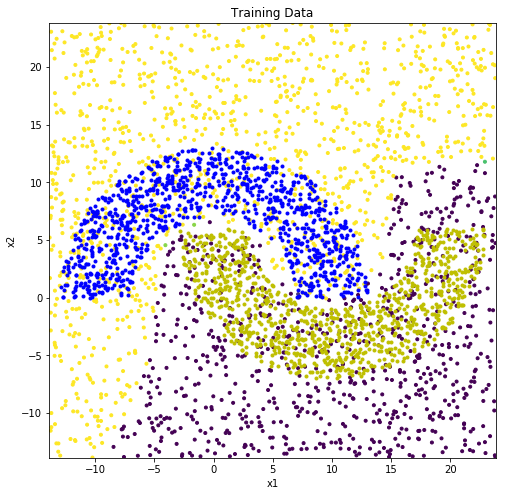

In [12]:

# Pixel wise classification
inputData_visualization()
randomDataSize = 2000
maxi = np.max([np.max(x1),np.max(x2)]) + 1
mini = np.min([np.min(x1),np.min(x2)]) - 1
pixelData = np.random.uniform(mini,maxi,(randomDataSize,inputDimensions))

outputUnsupervised = GetGaussian(weightMatrixUnsupervised,pixelData)
inputSupervised = np.transpose(outputUnsupervised)
outputSupervised = nn.FeedForward(inputPatterns=inputSupervised,weightMatrix=w2,returnType=2,architecture=arch)
out = np.reshape(outputSupervised,2000)
plt.scatter(pixelData[:,0],pixelData[:,1],c=out,marker='.')
plt.show()